<a href="https://colab.research.google.com/github/CCS-ZCU/pribehy-dat/blob/master/scripts/1_uvod-do-jupyter-notebooku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR pomocí Pythonu

K OCR lze v Pythonu použít knihovnu `pytesseract`, postavené na nástroji Tesseract. Nejprve je tudíž potřeba mít nainstallovaný Tesseract, což není triviální úloha, neboť závisí na konkrétní verzi operečního systému. Instrukce pro windows a linux je možné nalézt zde: https://github.com/UB-Mannheim/tesseract/wiki. Pro mac nám napoví např. ChatGPT. Jelikož pracuji na macu, zde nabízím příkazy k instalaci Tesseractu pomocí terminálového instalačního nástroje `brew`: 
``` 
brew install tessaract
brew install tessaract-lang
```

Pro ukázku si načteme jeden dokument z projektu scriptum.cz, který neprošel OCR analýzou:

In [8]:
#!pip install PyMuPDF
import fitz
import requests
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
import matplotlib.patches as patches
import re
from bs4 import BeautifulSoup
import pandas as pd
import nltk

In [3]:
url = "https://scriptum.cz/soubory/scriptum/komunikace/prazske_komunikace_1987_01.pdf"

pdf_object = io.BytesIO(requests.get(url).content)
doc = fitz.open("pdf", pdf_object.read())
doc.page_count

202

Pro potřeby testování opět vybereme jednu náhodnou stránku a vytvoříme z ní objekt obrázku.

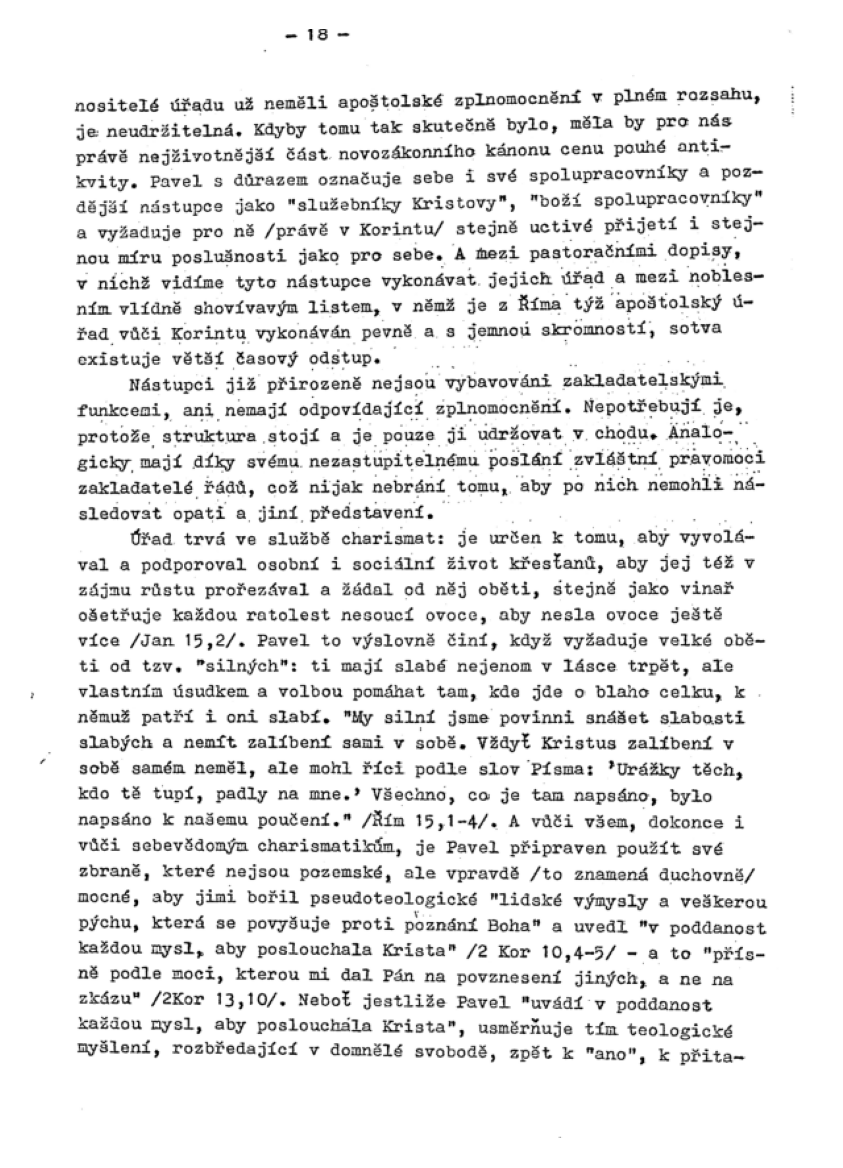

In [15]:
p = doc.load_page(20)
pix = p.get_pixmap()
np_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array)
ax.set_axis_off()

In [5]:
pytesseract.image_to_string(np_array, lang="ces")

'-8 -\n\nnositelé úřadu už neměli apoštolské zplnomoonění v plném rozsahu,\nje neudržitelná, Kdyby tomu tak skutečně bylo, měla by pro nás\nprávě nejživotnější část novozákonního kánonu cenu pouhé anti-\nkvity. Pavel s důrazem označuje sebe i své spolupracovníky A poz-\ndější nástupce jako "služebníky Kristovy", "boží spolupracovníky“\na vyžaduje pro ně /právě v Korintu/ stejně uctivé přijetí i stej-\nnou míru poslušnosti jako pro sebe, A úezi pastoračními dopisy,\n\nv nichž vidíme tyto nástupce vykonávat jejich úřad a mezi nobles-\nním vlídně shovívavým listem, v němž je z Říma týž apoštolský ú-\nřad vůči Korintu vykonáván pevně a s jemnou skromností, sotva\nexistuje větší časový odstup. .\n\nNástupci již přirozeně nejsou vybavování zakladatelskými.\nfunkoeni, ani nemají odpovídající úplnonocnění, Nepotřebují je,\nprotože struktura stojí a je pouze ji udržovat v chodu, Aňalo-,\ngicky, mají díky svému nezastupitelnému poslání zvláštní pravomoci\nzakladatelé řádů, což nijak nebrání tomu

-=

nositelé úřadu už neměli apoštolské zplnomoenění v plném rozsahu,
je neudršitolná, Kdyby tomu tak skutečně bylo, měla by pro nás
právě nejšivotnější část novozákonního kánonu cenu pouhé anti-
kvity, Pavel s důrazem označuje sebe i své spolupracovníky A poz-
dější nástupce jako "služebníky Kristovy", "boží spolupracovníky“
a vyžaduje pro ně /právě v Korintu/ stejně uotivé přijetí i stej-
nou míru poslušnosti jako pro sebo, A tezi pantoračhími dopisy,
v nishš vidíme tyto nástupce vykonávat. jejich úřad a mesi noblos-
mím vlídně ohovívavým listem, v němž je a Řína týš apošťolský ú-
řad vůči Korintu vykonáván povaš a s jemnoú skrómností, sotva
existuje větší časový odstup.
Mástupoi jiš přirozeně nejsou vybavování zakladatelskýni,
"plnomoonění, Nepotřebují. je,
ji udržovat, v. chodu,
Sicky, mají díky umí nezastupitelnénu poslání přát
zakladatelé řádů, což nijak nebrání tomu, aby po nióh nemohli.
sledovat opat Jiní, představa:
Úřad trvá ve službě oharismat: je určen k tomu, ahý vyvolá“
v

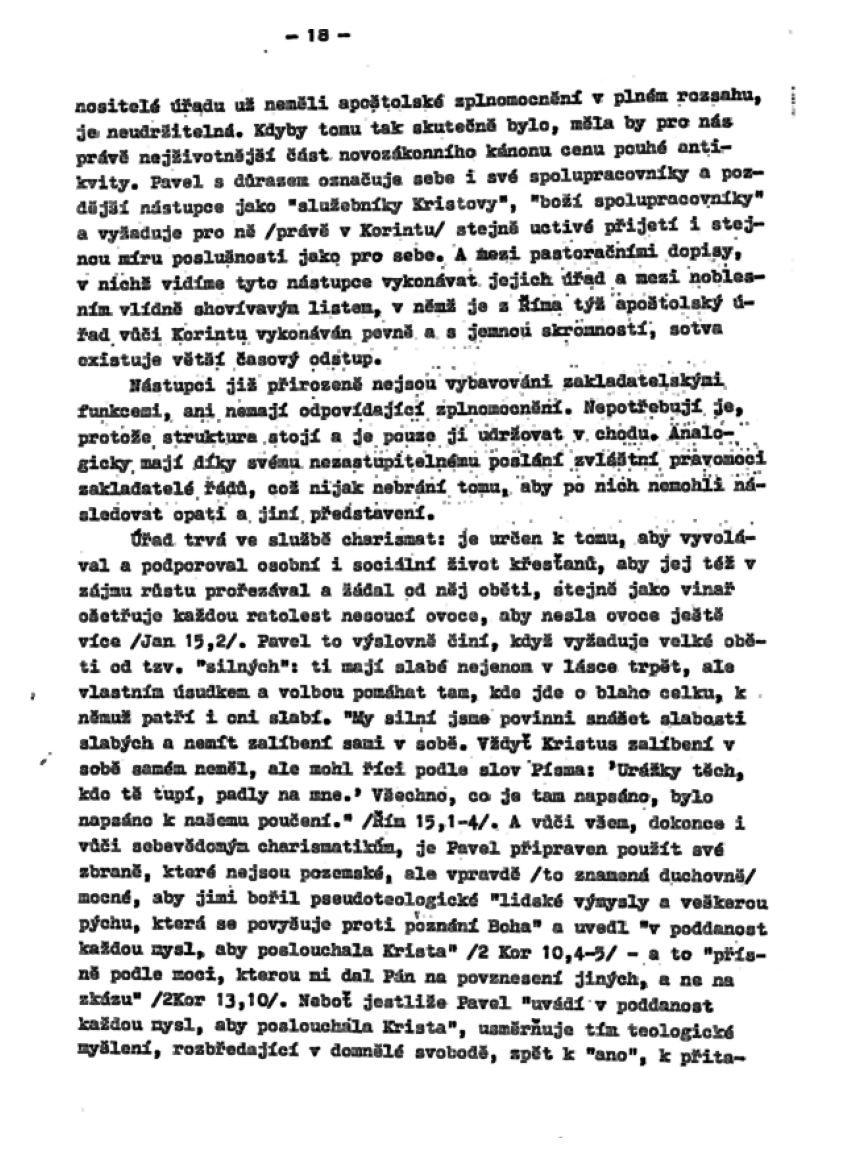

In [19]:
kernel = np.ones((2, 2), np.uint8)
np_array_corrected = cv2.erode(np_array, kernel, iterations=1)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array_corrected)
ax.set_axis_off()
print(pytesseract.image_to_string(np_array_corrected, lang="ces"))

-8 -

nositelé úřadu už neměli apoštolské zplnomoonění v plném rozsahu,
je neudržitelná, Kdyby tomu tak skutečně bylo, měla by pro nás
právě nejživotnější část novozákonního kánonu cenu pouhé anti-
kvity. Pavel s důrazem označuje sebe i své spolupracovníky A poz-
dější nástupce jako "služebníky Kristovy", "boží spolupracovníky“
a vyžaduje pro ně /právě v Korintu/ stejně uctivé přijetí i stej-
nou míru poslušnosti jako pro sebe, A úezi pastoračními dopisy,

v nichž vidíme tyto nástupce vykonávat jejich úřad a mezi nobles-
ním vlídně shovívavým listem, v němž je z Říma týž apoštolský ú-
řad vůči Korintu vykonáván pevně a s jemnou skromností, sotva
existuje větší časový odstup. .

Nástupci již přirozeně nejsou vybavování zakladatelskými.
funkoeni, ani nemají odpovídající úplnonocnění, Nepotřebují je,
protože struktura stojí a je pouze ji udržovat v chodu, Aňalo-,
gicky, mají díky svému nezastupitelnému poslání zvláštní pravomoci
zakladatelé řádů, což nijak nebrání tomu, aby po nich nemohl

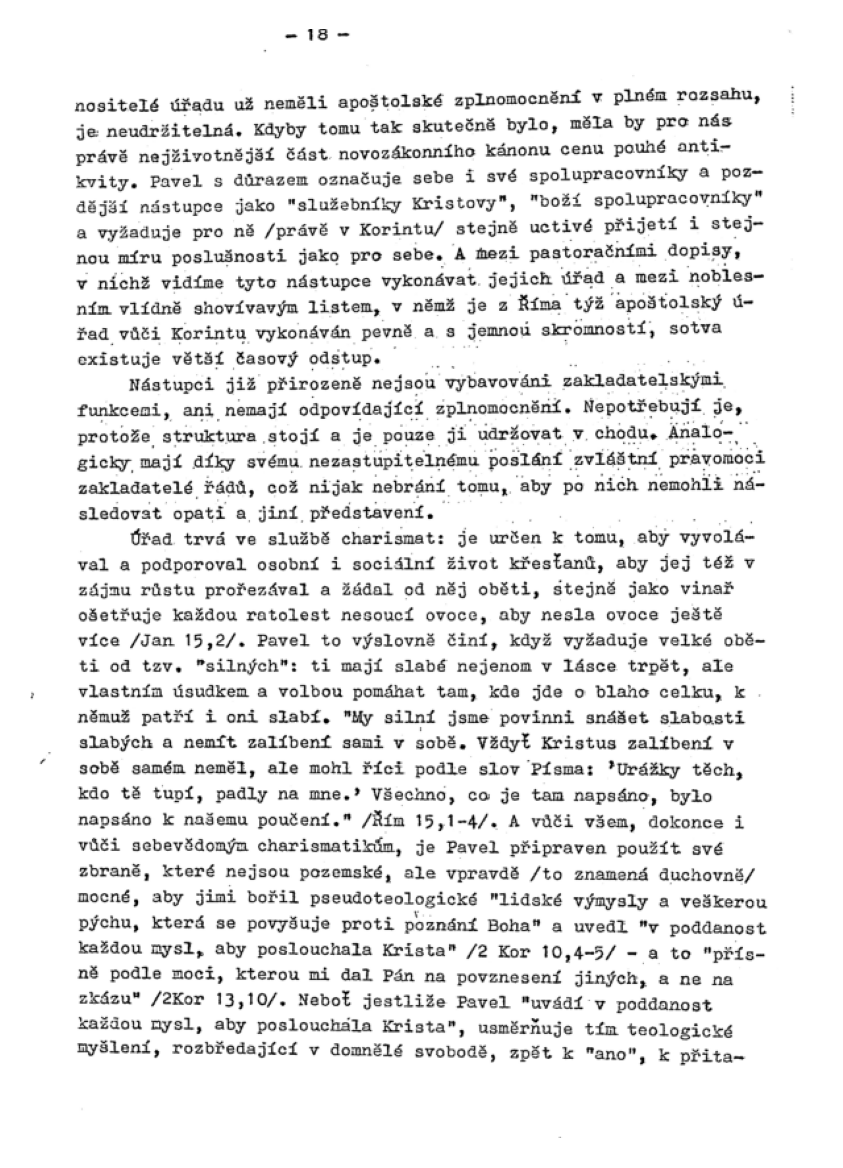

In [16]:
# DILATION
kernel = np.ones((1, 1), np.uint8)
np_array_corrected = cv2.dilate(np_array, kernel, iterations=1)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array_corrected)
ax.set_axis_off()
print(pytesseract.image_to_string(np_array_corrected, lang="ces"))

-8 -

nositelé úřadu už neměli apoštolské zplnomoonění v plném rozsahu,
je neudržitelná, Kdyby tomu tak skutečně bylo, měla by pro nás
právě nejživotnější část novozákonního kánonu cenu pouhé anti-
kvity. Pavel s důrazem označuje sebe i své spolupracovníky A poz-
dější nástupce jako "služebníky Kristovy", "boží spolupracovníky“
a vyžaduje pro ně /právě v Korintu/ stejně uctivé přijetí i stej-
nou míru poslušnosti jako pro sebe, A úezi pastoračními dopisy,

v nichž vidíme tyto nástupce vykonávat jejich úřad a mezi nobles-
ním vlídně shovívavým listem, v němž je z Říma týž apoštolský ú-
řad vůči Korintu vykonáván pevně a s jemnou skromností, sotva
existuje větší časový odstup. .

Nástupci již přirozeně nejsou vybavování zakladatelskými.
funkoeni, ani nemají odpovídající úplnonocnění, Nepotřebují je,
protože struktura stojí a je pouze ji udržovat v chodu, Aňalo-,
gicky, mají díky svému nezastupitelnému poslání zvláštní pravomoci
zakladatelé řádů, což nijak nebrání tomu, aby po nich nemohl

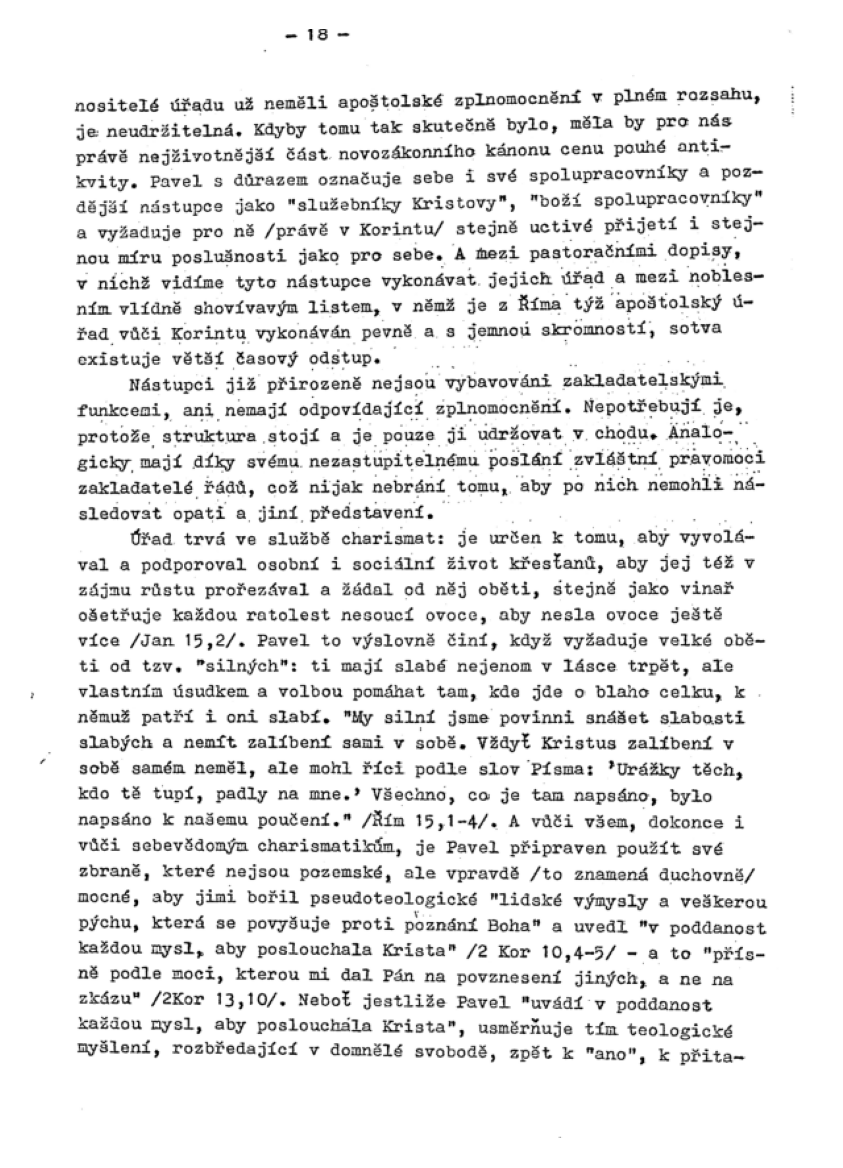

In [29]:

# EROSION
kernel = np.ones((1, 1), np.uint8)
np_array_corrected = cv2.erode(np_array, kernel, iterations=1)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array_corrected)
ax.set_axis_off()
print(pytesseract.image_to_string(np_array_corrected, lang="ces"))

-8 -

nositelé úřadu už neměli apoštolské zplnomoonění v plném rozsahu,
je neudržitelná, Kdyby tomu tak skutečně bylo, měla by pro nás
právě nejživotnější část novozákonního kánonu cenu pouhé anti-
kvity. Pavel s důrazem označuje sebe i své spolupracovníky A poz-
dější nástupce jako "služebníky Kristovy", "boží spolupracovníky“
a vyžaduje pro ně /právě v Korintu/ stejně uctivé přijetí i stej-
nou míru poslušnosti jako pro sebe, A úezi pastoračními dopisy,

v nichž vidíme tyto nástupce vykonávat jejich úřad a mezi nobles-
ním vlídně shovívavým listem, v němž je z Říma týž apoštolský ú-
řad vůči Korintu vykonáván pevně a s jemnou skromností, sotva
existuje větší časový odstup. .

Nástupci již přirozeně nejsou vybavování zakladatelskými.
funkoeni, ani nemají odpovídající úplnonocnění, Nepotřebují je,
protože struktura stojí a je pouze ji udržovat v chodu, Aňalo-,
gicky, mají díky svému nezastupitelnému poslání zvláštní pravomoci
zakladatelé řádů, což nijak nebrání tomu, aby po nich nemohl

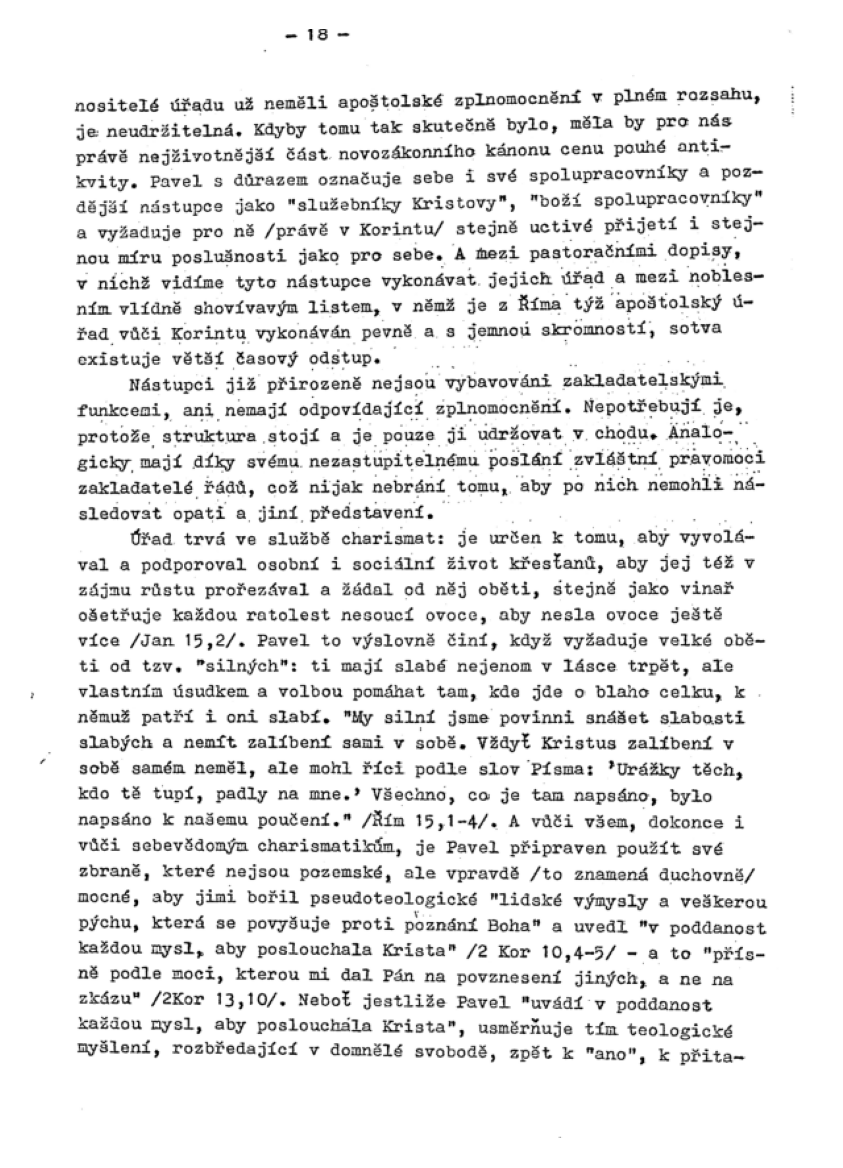

In [27]:

# CLOSING
kernel = np.ones((1, 1), np.uint8)
np_array_corrected = cv2.morphologyEx(np_array, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array_corrected)
ax.set_axis_off()
print(pytesseract.image_to_string(np_array_corrected, lang="ces"))

-8 -

nositelé úřadu už neměli apoštolské zplnomoonění v plném rozsahu,
je neudržitelná, Kdyby tomu tak skutečně bylo, měla by pro nás
právě nejživotnější část novozákonního kánonu cenu pouhé anti-
kvity. Pavel s důrazem označuje sebe i své spolupracovníky A poz-
dější nástupce jako "služebníky Kristovy", "boží spolupracovníky“
a vyžaduje pro ně /právě v Korintu/ stejně uctivé přijetí i stej-
nou míru poslušnosti jako pro sebe, A úezi pastoračními dopisy,

v nichž vidíme tyto nástupce vykonávat jejich úřad a mezi nobles-
ním vlídně shovívavým listem, v němž je z Říma týž apoštolský ú-
řad vůči Korintu vykonáván pevně a s jemnou skromností, sotva
existuje větší časový odstup. .

Nástupci již přirozeně nejsou vybavování zakladatelskými.
funkoeni, ani nemají odpovídající úplnonocnění, Nepotřebují je,
protože struktura stojí a je pouze ji udržovat v chodu, Aňalo-,
gicky, mají díky svému nezastupitelnému poslání zvláštní pravomoci
zakladatelé řádů, což nijak nebrání tomu, aby po nich nemohl

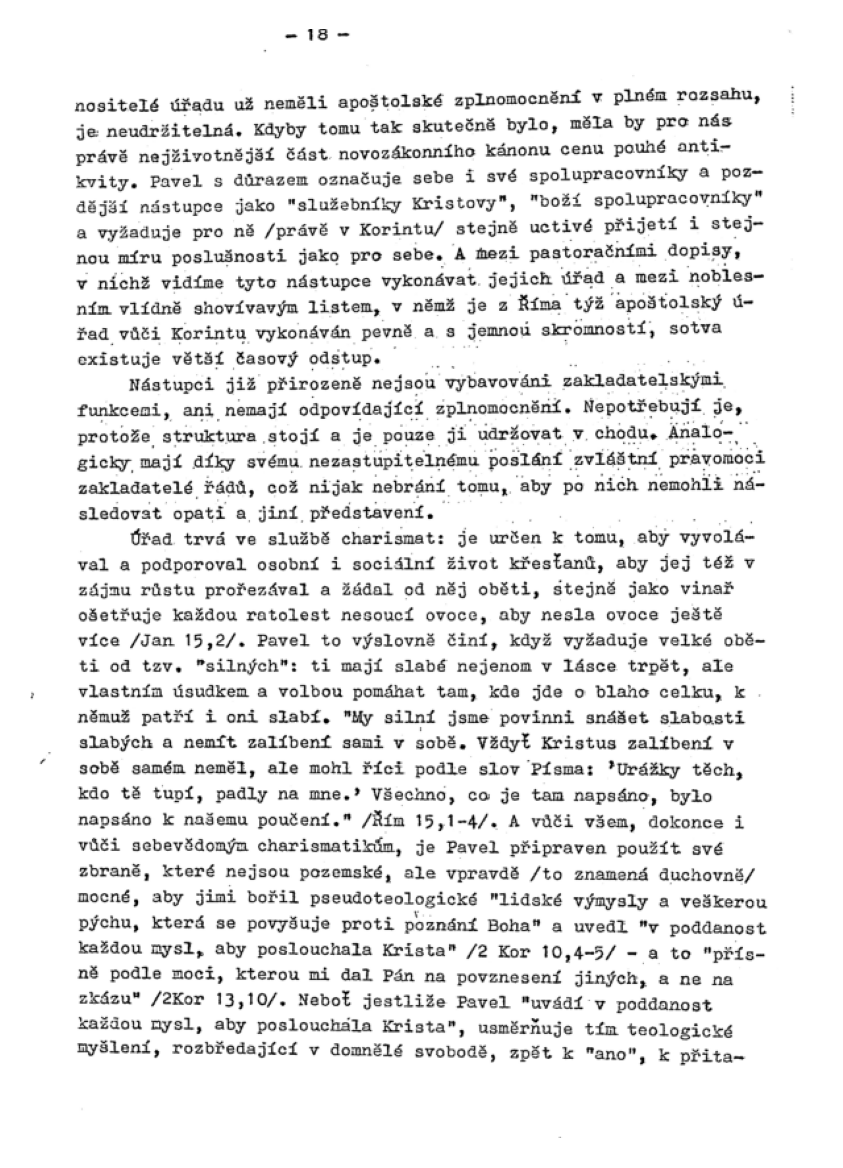

In [25]:
kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(np_array, cv2.MORPH_OPEN, kernel)
np_array_corrected = cv2.morphologyEx(np_array, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(dpi=300)
ax.imshow(np_array_corrected)
ax.set_axis_off()
print(pytesseract.image_to_string(np_array_corrected, lang="ces"))

In [ ]:
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)